# ANÁLISIS DE DATOS

# 1. Generar Datos Ficticios

Primero, generaremos un conjunto de datos ficticios.

In [65]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install sweetviz


Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns


# Generar datos ficticios
np.random.seed(0)
fechas = pd.date_range(start='2022-01-01', periods=200, freq='D')
categorias = ['Comida para Perros', 'Comida para Gatos', 'Comida para Aves', 'Comida para Peces']
data = {
    'Fecha': np.random.choice(fechas, 1000),
    'Categoria': np.random.choice(categorias, 1000),
    'Ventas': np.random.randint(100, 1000, 1000),
    'Ingresos': np.random.uniform(1000, 10000, 1000),
    'Promociones': np.random.randint(0, 20, 1000),
    'Descuento': np.random.uniform(0, 0.3, 1000)
}

df = pd.DataFrame(data)


In [69]:
# Guardar la data
df.to_csv('Comida de animales.csv', index=False)

## 2. Análisis Descriptivo

Realizaremos un análisis descriptivo de los datos.

In [72]:
# Estadísticas descriptivas
desc_stats = df.describe()
print(desc_stats)


                            Fecha       Ventas     Ingresos  Promociones  \
count                        1000  1000.000000  1000.000000  1000.000000   
mean   2022-04-12 09:47:31.200000   536.747000  5549.576778     9.145000   
min           2022-01-01 00:00:00   100.000000  1001.680425     0.000000   
25%           2022-02-23 00:00:00   300.000000  3310.944888     4.000000   
50%           2022-04-13 00:00:00   531.500000  5512.213147     9.000000   
75%           2022-05-30 00:00:00   762.000000  7825.842187    14.000000   
max           2022-07-19 00:00:00   999.000000  9992.872002    19.000000   
std                           NaN   266.333705  2586.200645     5.792714   

         Descuento  
count  1000.000000  
mean      0.143675  
min       0.000022  
25%       0.068575  
50%       0.142516  
75%       0.215175  
max       0.298720  
std       0.084841  


In [74]:
# Realizar el anàlisis descriptivo de cada variable utilice librerias

In [10]:
print(df['Categoria'].value_counts())

Categoria
Comida para Peces     259
Comida para Gatos     254
Comida para Perros    254
Comida para Aves      233
Name: count, dtype: int64


In [12]:
# Media, mediana, desviación estándar y varianza
print(f"Media de Ventas: {np.mean(df['Ventas'])}")
print(f"Mediana de Ventas: {np.median(df['Ventas'])}")
print(f"Desviación Estándar de Ventas: {np.std(df['Ventas'], ddof=0)}")
print(f"Varianza de Ventas: {np.var(df['Ventas'], ddof=0)}")

print(f"Media de Ingresos: {np.mean(df['Ingresos'])}")
print(f"Mediana de Ingresos: {np.median(df['Ingresos'])}")
print(f"Desviación Estándar de Ingresos: {np.std(df['Ingresos'], ddof=0)}")
print(f"Varianza de Ingresos: {np.var(df['Ingresos'], ddof=0)}")

Media de Ventas: 536.747
Mediana de Ventas: 531.5
Desviación Estándar de Ventas: 266.20050524181954
Varianza de Ventas: 70862.70899099999
Media de Ingresos: 5549.576777931189
Mediana de Ingresos: 5512.213147200965
Desviación Estándar de Ingresos: 2584.9072210899717
Varianza de Ingresos: 6681745.341643079


## 3. Análisis Predictivo

Utilizaremos un modelo de regresión lineal para predecir las ventas.

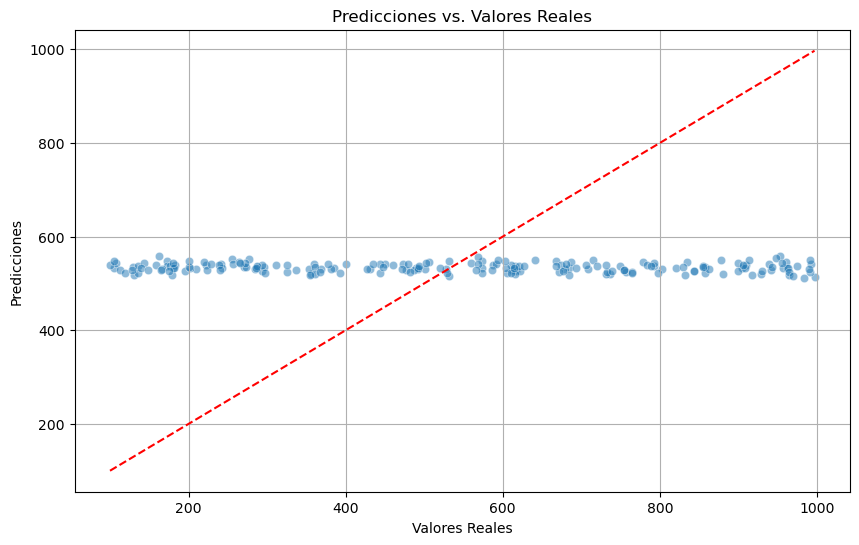

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Preparar los datos
X = df[['Ingresos', 'Promociones', 'Descuento']]
y = df['Ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
predicciones = model.predict(X_test)

#Representar de manera Gràfica
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de igualdad
plt.grid(True)
plt.savefig('prediccion.png')
plt.show()

In [ ]:
!pip install --upgrade numba pandas visions
!pip install --upgrade pandas-profiling

In [76]:
from pandas_profiling import ProfileReport

# Generar el reporte
profile = ProfileReport(df, title="Reporte de Análisis de Ventas", explorative=True)

# Guardar el reporte en un archivo HTML
profile.to_file("reporte_pandas_profiling.html")


AttributeError: module 'numba' has no attribute 'generated_jit'

In [78]:
import sweetviz as sv

# Generar el reporte
report = sv.analyze(df)

# Guardar el reporte en un archivo HTML
report.show_html('reporte_sweetviz.html')

                                             |          | [  0%]   00:00 -> (? left)

Report reporte_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 4. Análisis de Series Temporales

Realizaremos un análisis de series temporales con un gráfico.

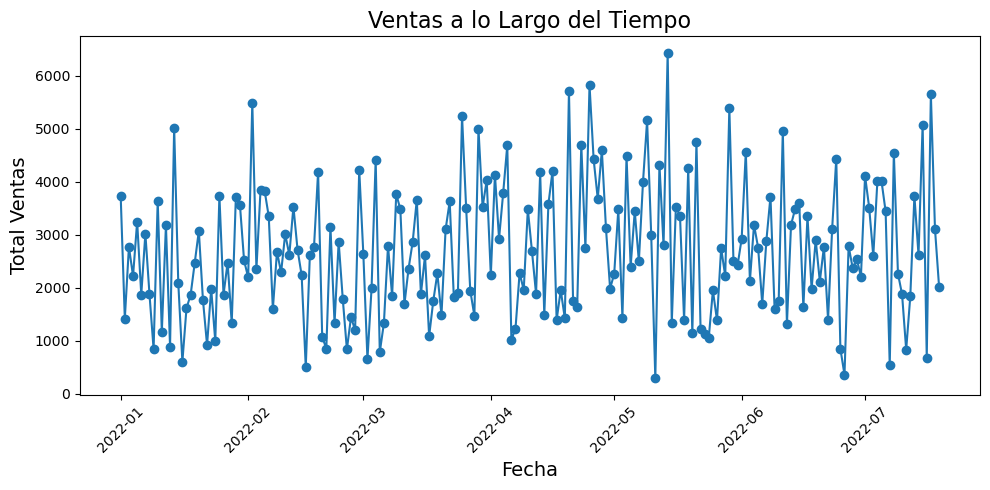

In [18]:
import matplotlib.pyplot as plt

# Ventas por fecha
ventas_fecha = df.groupby('Fecha').agg({'Ventas': 'sum'}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(ventas_fecha['Fecha'], ventas_fecha['Ventas'], marker='o')
plt.title("Ventas a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Total Ventas", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('serie_temporal.png')
plt.show()



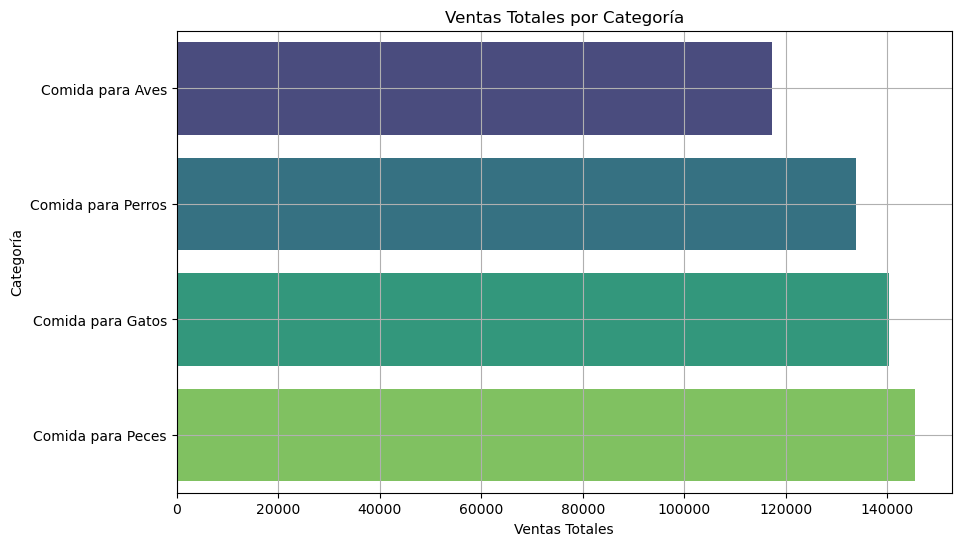

In [28]:
# Ventas totales por categoría
ventas_categoria = df.groupby('Categoria')['Ventas'].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_categoria.values, y=ventas_categoria.index, palette='viridis')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría')
plt.title('Ventas Totales por Categoría')
plt.grid(True)
plt.savefig('ventas_totales_por_categoria.png')  # Guardar en PNG
plt.show()

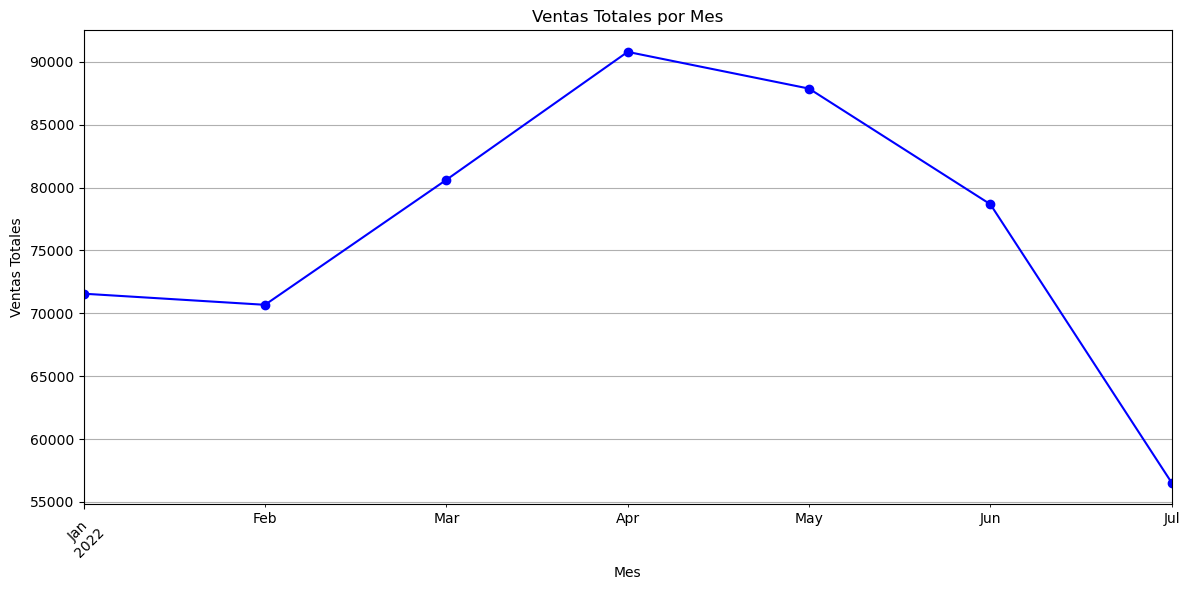

In [30]:
df['Mes'] = df['Fecha'].dt.to_period('M')
ventas_mensuales = df.groupby('Mes')['Ventas'].sum()

plt.figure(figsize=(12, 6))
ventas_mensuales.plot(kind='line', marker='o', linestyle='-', color='b')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Mes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ventas_mensuales.png')  # Guardar en PNG
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


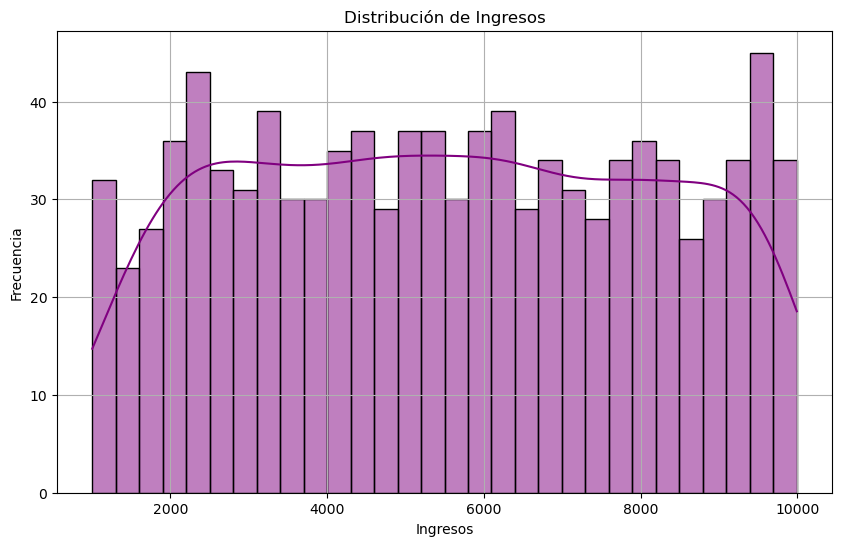

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ingresos'], kde=True, bins=30, color='purple')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos')
plt.grid(True)
plt.savefig('distribucion_de_ingresos.png')  # Guardar en PNG
plt.show()

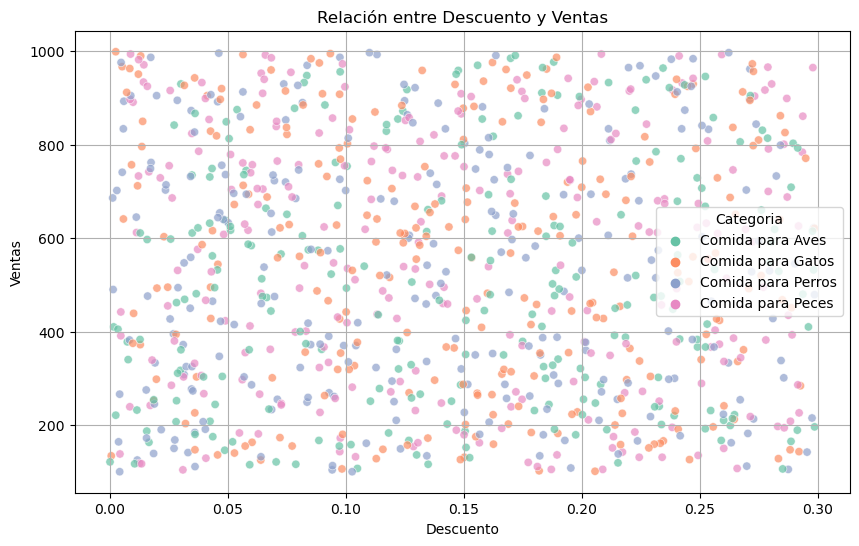

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Descuento', y='Ventas', hue='Categoria', palette='Set2', alpha=0.7)
plt.xlabel('Descuento')
plt.ylabel('Ventas')
plt.title('Relación entre Descuento y Ventas')
plt.grid(True)
plt.savefig('descuento_vs_ventas.png')  # Guardar en PNG
plt.show()

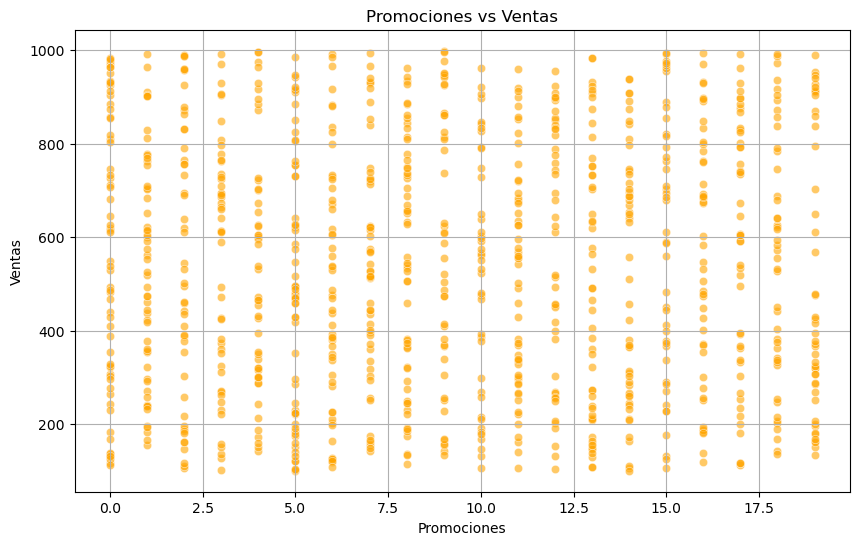

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Promociones', y='Ventas', color='orange', alpha=0.6)
plt.xlabel('Promociones')
plt.ylabel('Ventas')
plt.title('Promociones vs Ventas')
plt.grid(True)
plt.savefig('promociones_vs_ventas.png')  # Guardar en PNG
plt.show()

<Figure size 1400x800 with 0 Axes>

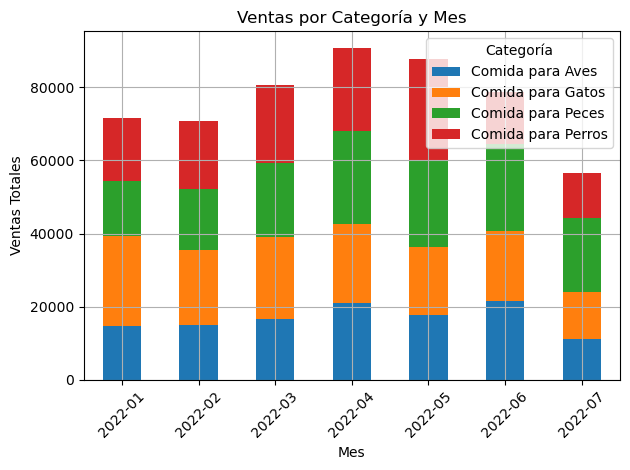

In [38]:
ventas_categoria_mes = df.groupby(['Mes', 'Categoria'])['Ventas'].sum().unstack()

plt.figure(figsize=(14, 8))
ventas_categoria_mes.plot(kind='bar', stacked=True)
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.title('Ventas por Categoría y Mes')
plt.legend(title='Categoría')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ventas_por_categoria_y_mes.png')  # Guardar en PNG
plt.show()

## 5. Segmentación de Datos
Realizaremos la segmentación de los datos.

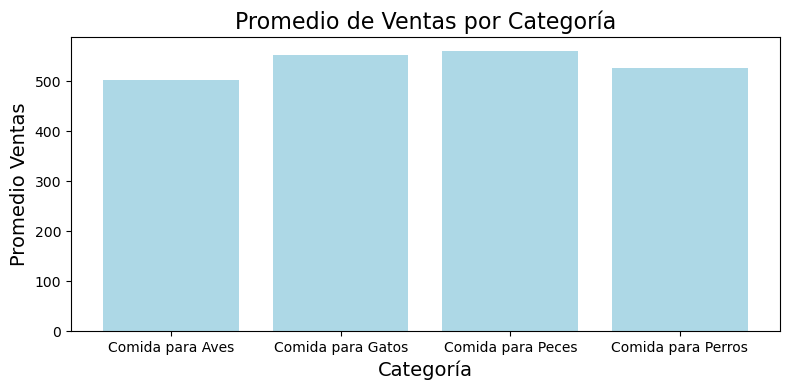

In [22]:
segmentos = df.groupby('Categoria').agg({'Ventas': 'mean'}).reset_index()

plt.figure(figsize=(8, 4))
plt.bar(segmentos['Categoria'], segmentos['Ventas'], color='lightblue')
plt.title("Promedio de Ventas por Categoría", fontsize=16)
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Promedio Ventas", fontsize=14)
plt.tight_layout()
plt.savefig('segmentacion.png')
plt.show()


## 6. Optimización y Modelo de Decisiones

Realizaremos una optimización simple usando scipy.

In [13]:
from scipy.optimize import linprog

# Definir coeficientes de la función objetivo (negativa para maximizar)
c = [-20, -15]  # Ejemplo de coeficientes
A = [[1, 1], [20, 15]]
b = [40, 500]

# Realizar la optimización
res = linprog(c, A_ub=A, b_ub=b)
print("Resultados de la optimización:", res)


Resultados de la optimización:         message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -500.00000000000006
              x: [ 0.000e+00  3.333e+01]
            nit: 1
          lower:  residual: [ 0.000e+00  3.333e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 6.667e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


## 7. Crear la Presentación Ejecutiva

Finalmente, crearemos la presentación en PowerPoint.

In [45]:
!pip install python-pptx


   ---------------------------------------- 0.0/471.6 kB ? eta -:--:--
    --------------------------------------- 10.2/471.6 kB ? eta -:--:--
   -- ------------------------------------ 30.7/471.6 kB 445.2 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/471.6 kB 445.2 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/471.6 kB 445.2 kB/s eta 0:00:01
   ----- --------------------------------- 71.7/471.6 kB 281.8 kB/s eta 0:00:02
   --------- ---------------------------- 112.6/471.6 kB 386.4 kB/s eta 0:00:01
   --------- ---------------------------- 112.6/471.6 kB 386.4 kB/s eta 0:00:01
   --------- ---------------------------- 122.9/471.6 kB 328.4 kB/s eta 0:00:02
   --------- ---------------------------- 122.9/471.6 kB 328.4 kB/s eta 0:00:02
   --------- ---------------------------- 122.9/471.6 kB 328.4 kB/s eta 0:00:02
   --------- ---------------------------- 122.9/471.6 kB 328.4 kB/s eta 0:00:02
   ------------------ ------------------- 225.3/471.6 kB 

In [ ]:
#Crear la presentaciòn de los datos con Power Bi

In [51]:
from pptx import Presentation
from pptx.util import Inches

# Crear presentación
prs = Presentation()

# Función para agregar un título y un subtítulo
def add_title_slide(title, subtitle):
    slide = prs.slides.add_slide(prs.slide_layouts[0])
    slide.shapes.title.text = title
    slide.placeholders[1].text = subtitle

# Diapositiva de título
add_title_slide("Análisis de Ventas de Comida para Mascotas", "Análisis completo de datos y resultados")

# Estadísticas Descriptivas
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Estadísticas Descriptivas"

# Asegúrate de que `desc_stats` es un DataFrame o Serie
desc_stats_text = desc_stats.to_string() if 'desc_stats' in locals() else 'No se han calculado estadísticas descriptivas aún.'
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
text_frame = content.text_frame
text_frame.text = desc_stats_text

# Gráfico de ventas por categoría
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Promedio de Ventas por Categoría"
slide.shapes.add_picture("segmentacion.png", Inches(0.5), Inches(1), width=Inches(8))

# Análisis de Series Temporales
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Ventas a lo Largo del Tiempo"
slide.shapes.add_picture("serie_temporal.png", Inches(0.5), Inches(1), width=Inches(8))

# Gráfica de ventas con descuentos
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Descuentos en Relación a las Ventas"
slide.shapes.add_picture("descuento_vs_ventas.png", Inches(0.5), Inches(1), width=Inches(8))

# Distribución de ingresos
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Distribución de Ingresos"
slide.shapes.add_picture("distribucion_de_ingresos.png", Inches(0.5), Inches(1), width=Inches(8))

# Promociones en relación a las ventas
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Promociones en Relación a las Ventas"
slide.shapes.add_picture("promociones_vs_ventas.png", Inches(0.5), Inches(1), width=Inches(8))

# Ventas mensuales
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Ventas Mensuales"
slide.shapes.add_picture("ventas_mensuales.png", Inches(0.5), Inches(1), width=Inches(8))

# Ventas mensuales por categoría
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Ventas Mensuales por Categoría"
slide.shapes.add_picture("ventas_por_categoria_y_mes.png", Inches(0.5), Inches(1), width=Inches(8))

# Ventas totales por categoría
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Ventas Totales por Categoría"
slide.shapes.add_picture("ventas_totales_por_categoria.png", Inches(0.5), Inches(1), width=Inches(8))

# Resultados de Optimización
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Resultados de Optimización"

# Asegúrate de que `res` es el resultado de una optimización
optimization_result = (
    f"Comida para Perros: {res.x[0]:.2f}\n"
    f"Comida para Gatos: {res.x[1]:.2f}\n"
    f"Ganancia Total: {-res.fun:.2f}"
) if 'res' in locals() else 'No se ha realizado una optimización aún.'
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
text_frame = content.text_frame
text_frame.text = optimization_result

# Conclusiones Finales
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Conclusiones Finales"

conclusiones = (
    "1. Identificamos las categorías más vendidas y sus tendencias.\n"
    "2. El modelo predictivo proporciona información valiosa sobre ventas.\n"
    "3. Las promociones tienen un impacto significativo en las ventas.\n"
    "4. La optimización sugiere cantidades óptimas para maximizar ganancias."
)
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
text_frame = content.text_frame
text_frame.text = conclusiones

# Guardar la presentación
prs.save("Analisis_Ventas_Pets_Completo.pptx")
